# Clustering

References:

* https://campus.datacamp.com/courses/cluster-analysis-in-python/
* https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import cdist 
import seaborn as sns

## Generating data to analyze

In [118]:
df = pd.DataFrame(np.random.randint(1, 100, size=(100, 2)), columns=["x", "y"]).astype(float)
display(df.head())

,x,y
0,22.0,88.0
1,72.0,44.0
2,95.0,12.0
3,78.0,68.0
4,58.0,83.0


## K-Means (Using sckit-learn)

,x,y,cluster
0,22.0,88.0,4
1,72.0,44.0,3
2,95.0,12.0,0
3,78.0,68.0,2
4,58.0,83.0,2


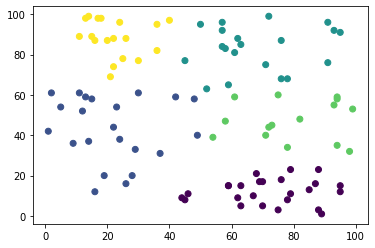

In [126]:
# Need to import here because having `KMeans` and `kmeans` functions causes problems
from sklearn.cluster import KMeans

df1 = df.copy()

model = KMeans(n_clusters=5, random_state=1)
df1["cluster"] = model.fit_predict(df)
display(df1.head())

plt.scatter(df1["x"], df1["y"], c=df1["cluster"])
plt.show()

## K-Means (using scipy)

,x,y,cluster
0,22.0,88.0,0
1,72.0,44.0,2
2,95.0,12.0,1
3,78.0,68.0,4
4,58.0,83.0,4


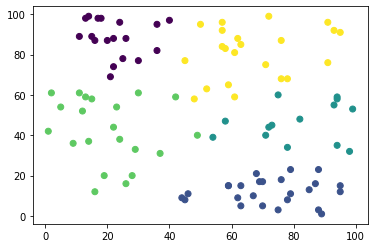

In [127]:
from scipy.cluster.vq import kmeans, vq

df2 = df.copy()

centroids, _ = kmeans(df2, 5)

# Assign cluster labels
df2["cluster"], _ = vq(df2, centroids)

display(df2.head())

# Plot the points with seaborn
plt.scatter(df2["x"], df2["y"], c=df2["cluster"])
plt.show()

### Measuring inertia and distortion (using scikit-learn)

* "Inertia is the sum of squared distances of samples to their closest cluster centre."
* "Distortion is the average of the euclidean squared distance from the centroid of the respective clusters."

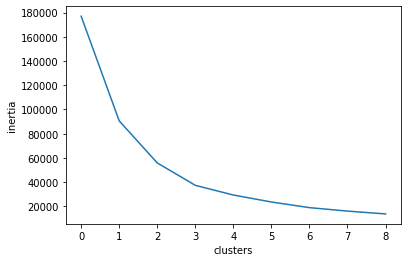

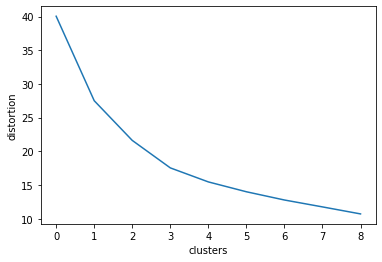

In [135]:
inertias = []
distortions = []
for n in range(1, 10):
    model = KMeans(n_clusters=n, random_state=1)
    model.fit(df)
    
    inertias.append(model.inertia_)

    distortion = sum(np.min(cdist(df, model.cluster_centers_, "euclidean"), axis=1)) / df.shape[0]
    distortions.append(distortion) 
    
plt.plot(inertias)
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.show()

plt.plot(distortions)
plt.xlabel("clusters")
plt.ylabel("distortion")
plt.show()

### Measuring inertia and distortion (using scipy)

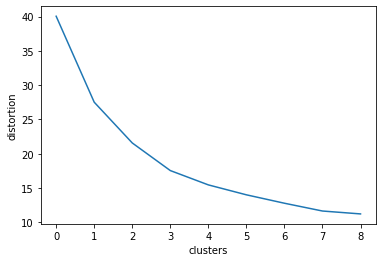

In [133]:
from scipy.cluster.vq import kmeans

inertias = []
distortions = []
for n in range(1, 10):
    centroids, distortion = kmeans(df, n)
    
#    inertias.append(model.inertia_)

    distortions.append(distortion) 
    
# fig, ax = plt.subplots()
# ax.plot(range(1, len(inertias) + 1), inertias, marker='o')
# ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# ax.set_ylim(ymin=0)
# plt.xlabel("number of clusters, k")
# plt.ylabel("inertia")
# plt.show()

plt.plot(distortions)
plt.xlabel("clusters")
plt.ylabel("distortion")
plt.show()

### Visualizing centroids

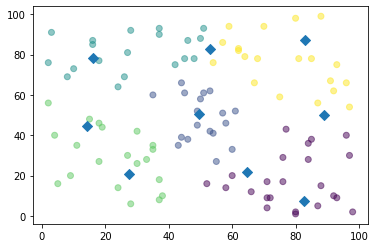

In [106]:
plt.scatter(df["x"], df["y"], c=labels, alpha=0.5)

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

### Using in a pipeline

In [107]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=8, random_state=1)
pipe = make_pipeline(scaler, kmeans)

labels = pipe.fit_predict(df)
print(labels[0:11])

[0 5 0 1 0 0 4 6 3 5 0]


## Hierarchical Clustering

,x,y,cluster_labels
0,76,17,1
1,58,14,1
2,80,2,1
3,49,52,2
4,98,2,1


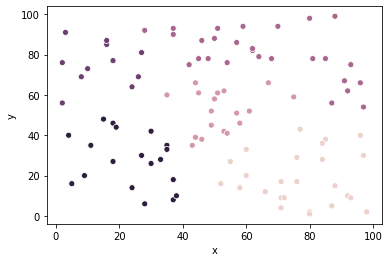

In [108]:
# linkage: Perform hierarchical/agglomerative clustering.
# method=’ward’ uses the Ward variance minimization algorithm.
mergings = linkage(df, method="ward")

# Generate cluster labels
# Z: The hierarchical clustering encoded with the matrix returned by the linkage function.
# criterion: maxclust: Finds a minimum threshold r so that the cophenetic distance between any two original 
#           observations in the same flat cluster is no more than r and no more than t flat clusters are formed.
# When criterion is "maxclust" then "t" is "this would be max number of clusters requested."
df["cluster_labels"] = fcluster(Z=mergings, t=5, criterion="maxclust")

display(df.head())

# Plot the points with seaborn
sns.scatterplot("x", "y", hue="cluster_labels", data=df, legend=None)
plt.show()

## Dendogram

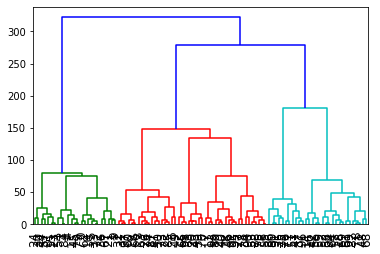

In [109]:
dendrogram(mergings,
    leaf_rotation=90,
    leaf_font_size=12
)
plt.show()